# Actividad Regresion Lineal

Con las base de datos de ENSANUT para adultos de entre 25 y 65 años de los estados del Occidente del pais, estadiar las relaciones siguientes:  
1. Peso y estatura; incluyendo ajustar un modelo de regresión lineal simple. Use peso como variable dependiente y a estatura como independiente. Comente el tipo de relación, el coeficiente de correlación y la calidad del ajuste del modelo.  
2.  Peso y cintura; incluyendo ajustar un modelo de regresión lineal simple. Interprete.  
3. ¿Quién pronostica mejor el peso: estutura o cintura?

---

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm


df = pd.read_excel('EnsanutMediciones.xlsx')

#### Limpieza y filtrado de datos

In [45]:
columnas = ['sexo', 'edad', 'peso', 'cintura', 'talla', 'entidad']
df = df[columnas]

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# limpeza cintura
df = df[df['cintura'] != 222.2]
df.dropna(subset=['cintura'], inplace=True)

# limpieza talla
df = df[df['talla'] != 222.2]
df.dropna(subset=['talla'], inplace=True)

# limpieza peso
df = df[df['peso'] != 222.2]
df.dropna(subset=['peso'], inplace=True)

# seleccion
df = df[(df['edad'] >= 25) & (df['edad'] <= 65)]
df = df[(df['entidad'] == 1) | 
        (df['entidad'] == 6) | 
        (df['entidad'] == 11) | 
        (df['entidad'] == 14) |
        (df['entidad'] == 16) |
        (df['entidad'] == 18)]

#### Graficas de dispersión

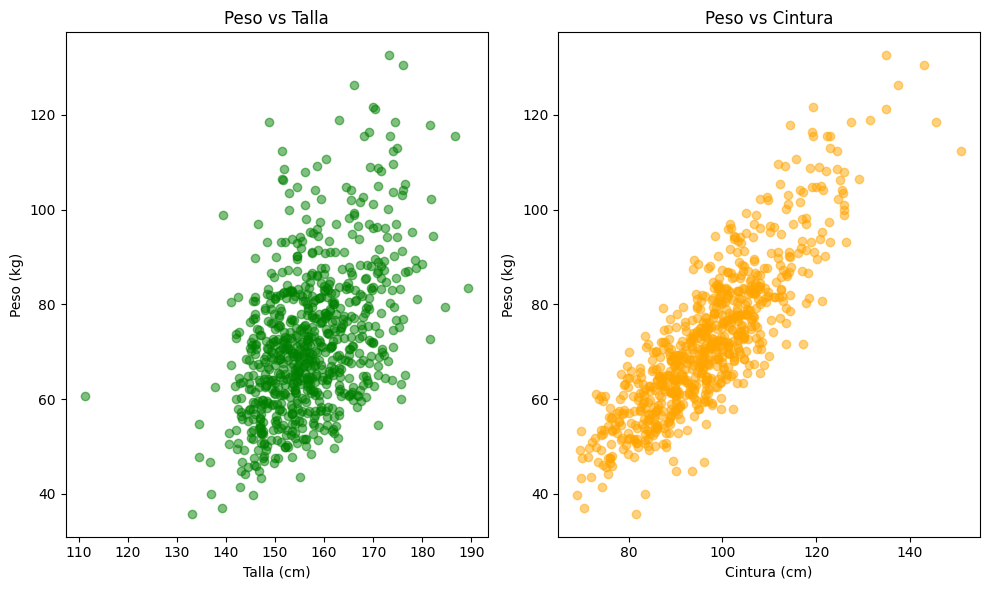

In [46]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['talla'], df['peso'], alpha=0.5, color='green')
plt.title('Peso vs Talla')
plt.xlabel('Talla (cm)')
plt.ylabel('Peso (kg)')

plt.subplot(1, 2, 2)
plt.scatter(df['cintura'], df['peso'], alpha=0.5, color='orange')
plt.title('Peso vs Cintura')
plt.xlabel('Cintura (cm)')
plt.ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

In [47]:
# Eliminamos valor atípico en talla (valores solo mayores a 120 cm)
df = df[df['talla'] > 120]

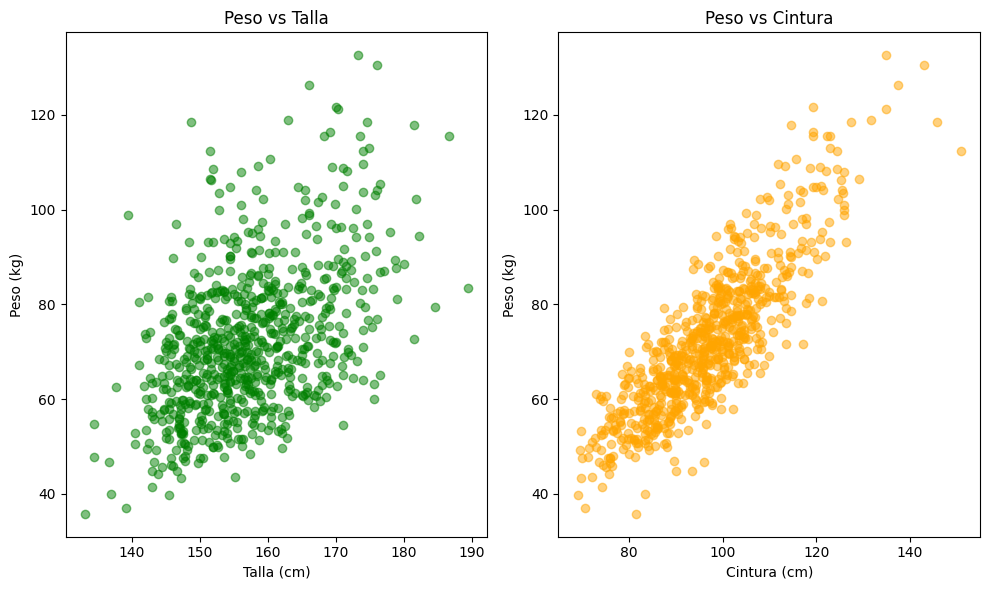

In [48]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['talla'], df['peso'], alpha=0.5, color='green')
plt.title('Peso vs Talla')
plt.xlabel('Talla (cm)')
plt.ylabel('Peso (kg)')

plt.subplot(1, 2, 2)
plt.scatter(df['cintura'], df['peso'], alpha=0.5, color='orange')
plt.title('Peso vs Cintura')
plt.xlabel('Cintura (cm)')
plt.ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

#### 1. Peso y estatura

In [49]:
correlacion_talla = df['peso'].corr(df['talla'])

print(f'Coeficiente de correlación entre Peso y Talla: {correlacion_talla:.4f}')

Coeficiente de correlación entre Peso y Talla: 0.4791


In [50]:
x = df[['peso']]
y_talla = df['talla']


Coeficientes del modelo:
Intercepto: 136.8603
Pendiente (Peso): 0.2817

El R² del modelo es: 23.0%


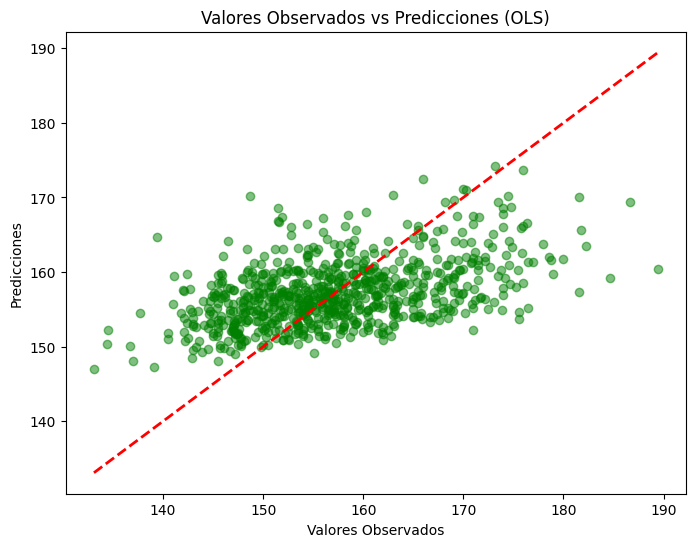

In [51]:
# Entrenamiento del modelo de regresión lineal para Talla
model_talla = smf.ols('talla ~ peso', data=df).fit()

# Estadisticos del modelo para Talla
print("\nCoeficientes del modelo:")
print(f"Intercepto: {model_talla.params['Intercept']:.4f}")
print(f"Pendiente (Peso): {model_talla.params['peso']:.4f}")

r2 = model_talla.rsquared
print(f"\nEl R² del modelo es: {100 * round(r2, 3)}%")

# Predicciones
predicciones = model_talla.predict(df)

# Gráfico de valores observados vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_talla, predicciones, alpha=0.5, color='green')
plt.plot([y_talla.min(), y_talla.max()], [y_talla.min(), y_talla.max()], 'r--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Predicciones')
plt.title('Valores Observados vs Predicciones (OLS)')
plt.show()

La relacion entre el peso y la talla es positiva pero debil de 0.48. Aunque las personas mas altas tienden a pesar mas con una pendiente de 0.28 kg por cm, la talla solo explica el 23% de la variacion del peso. Por lo tanto, el modelo describe una tendencia general, pero no es preciso para predecir el peso individual, el cual depende de muchos otros factores.

---

#### 2. Peso y cintura

In [52]:
correlacion_cintura = df['peso'].corr(df['cintura'])

print(f'Coeficiente de correlación entre Peso y Cintura: {correlacion_cintura:.4f}')

Coeficiente de correlación entre Peso y Cintura: 0.8558


In [53]:
x = df[['peso']]
y_cintura= df['cintura']


Coeficientes del modelo:
Intercepto: 46.3443
Pendiente (Peso): 0.6986

El R² del modelo es: 73.2%


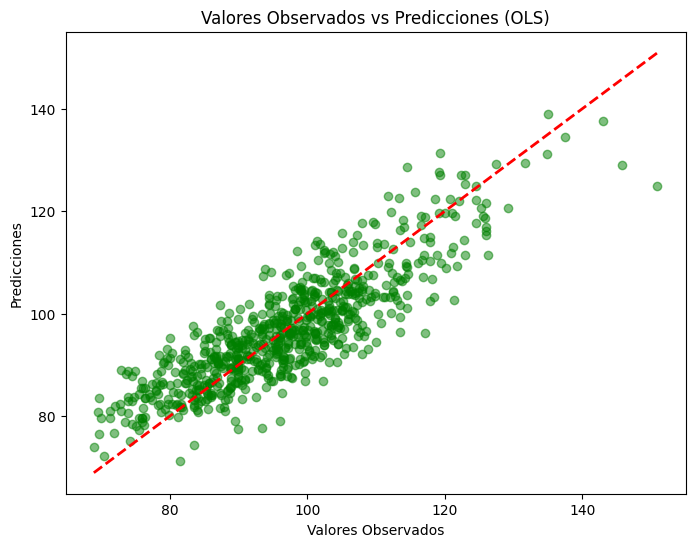

In [54]:
# Entrenamiento del modelo de regresión lineal para Talla
model_cintura = smf.ols('cintura ~ peso', data=df).fit()

# Estadisticos del modelo para Talla
print("\nCoeficientes del modelo:")
print(f"Intercepto: {model_cintura.params['Intercept']:.4f}")
print(f"Pendiente (Peso): {model_cintura.params['peso']:.4f}")

r2 = model_cintura.rsquared
print(f"\nEl R² del modelo es: {100 * round(r2, 3)}%")

# Predicciones
predicciones = model_cintura.predict(df)

# Gráfico de valores observados vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_cintura, predicciones, alpha=0.5, color='green')
plt.plot([y_cintura.min(), y_cintura.max()], [y_cintura.min(), y_cintura.max()], 'r--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Predicciones')
plt.title('Valores Observados vs Predicciones (OLS)')
plt.show()

La relacion entre el peso y la circunferencia de la cintura es muy fuerte y positiva de 0.86. El modelo es bastante predictivo, indicando que por cada centimetro adicional de cintura, el peso aumenta en promedio 0.70 kg. El coeficiente de determinacion de $R^2$ del 73% confirma que la cintura explica la mayor parte de la variabilidad del peso, lo que la convierte en un predictor fuerte y confiable en esta poblacion.

---

#### 3. ¿Quien pronostica mejor?

El modelo que utiliza la cintura tiene una capacidad predictiva tres veces mayor que el modelo que utiliza la talla teniendo 0.73 vs. 0.23.Esto significa que, para esta poblacion analizada, el conocimiento de la circunferencia de la cintura proporciona mucha más informacion util para predecir el peso de una persona que el conocimiento de su estatura.